# Goal
In this talk, we will analyze the patient experience data collected from the Manipal Hospitals, which is the oldest medical care group in India. In 2017, they served approx. 2 million clients from India and abroad. They have more than 5 200 beds across 16 hospitals.

Using this data we will try to find opportunities, that Ajay Bakshi, MD and CEO of Manipial Hospitals, can use to improve the patient experience of Manipal Hospitals.

The data can be downloaded from the [Predicting NPS to Improve Patient Experience](https://www.kaggle.com/c/puj-1910-predicting/overview) kaggle competition. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np
%matplotlib inline

In [42]:
training_data = pd.read_csv("../data/Training Data.csv")

In [43]:
column_es_en_mapping = {
    'CONSECUTIVO': "SurveyID",
    'ID': "PatientID",
    'ESTADOCIVIL': "PatientCivilStatus",
    'EDAD': "PatientAge",
    'GENERO': "PatientGender",
    'CATEGORIACAMA': "HospitalizationType",
    'DEPARTAMENTO': "Department",
    'COSTOESTIMADO': "AverageHospializationCost",
    'CATEGORIA': "AffiliationType",
    'ESTADO': "State",
    'PAIS': "Country", 
    'ZONA': "Zone", 
    'FECHAENTRADA': "PatientAdmissionDate",
    'FECHASALIDA': "PatientExitDate",
    'DIASINTERNADO': "HospitalizationDays",
    'SCORENPS': "LTR",    
}

In [44]:
training_data.rename(columns=column_es_en_mapping, inplace=True)

In [24]:
training_data.head()

,SurveyID,PatientID,PatientCivilStatus,PatientAge,PatientGender,HospitalizationType,Department,AverageHospializationCost,AffiliationType,State,Country,Zone,CE_ACCESSIBILITY,CE_CSAT,CE_VALUEFORMONEY,EM_IMMEDIATEATTENTION,EM_NURSING,EM_DOCTOR,EM_OVERALL,AD_TIME,AD_TARRIFFPACKAGESEXPLAINATION,AD_STAFFATTITUDE,INR_ROOMCLEANLINESS,INR_ROOMPEACE,INR_ROOMEQUIPMENT,INR_ROOMAMBIENCE,FNB_FOODQUALITY,FNB_FOODDELIVERYTIME,FNB_DIETICIAN,FNB_STAFFATTITUDE,AE_ATTENDEECARE,AE_PATIENTSTATUSINFO,AE_ATTENDEEFOOD,DOC_TREATMENTEXPLAINATION,DOC_ATTITUDE,DOC_VISITS,DOC_TREATMENTEFFECTIVENESS,NS_CALLBELLRESPONSE,NS_NURSESATTITUDE,NS_NURSEPROACTIVENESS,NS_NURSEPATIENCE,OVS_OVERALLSTAFFATTITUDE,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,PatientAdmissionDate,PatientExitDate,HospitalizationDays,LTR,NPS
0,1,35236,Single,4.0,F,SPECIAL,PEDIATRIC,25000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,2,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2014-07-18,2014-07-21,3,9,Promotor
1,2,35237,Single,13.0,F,SPECIAL,PEDIATRIC,15000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2014-07-11,2014-07-16,5,10,Promotor
2,3,35234,Married,33.0,F,SEMISPECIAL,GYNAEC,70000.0,EXEMPTION,Karnataka,INDIA,SOUTH,3,2,2,4,4,4,4,3,3,4,3,3,3,3,2,3,3,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,3,4,3,2014-06-17,2014-07-20,33,7,Passive
3,4,35232,Married,51.0,F,SPECIAL,GYNAEC,150000.0,PATIENT,West Bengal,INDIA,EAST,4,4,3,4,4,4,4,4,4,4,3,4,4,3,3,4,4,4,3,4,3,4,4,4,4,4,4,3,4,4,3,3,3,4,3,2014-07-16,2014-07-22,6,10,Promotor
4,5,35233,Married,31.0,F,SPECIAL,GYNAEC,100000.0,INSURANCE,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2014-07-13,2014-07-16,3,10,Promotor


In [ ]:
def vis_correlation_matrix(corr: np.ndarray, figsize=(15, 14)):


    mask = np.triu(np.ones_like(corr, dtype=bool))
    _ = plt.figure(figsize=figsize)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmin=-1,
        vmax=1,
        center=0,
        annot=True,
        fmt=".2f",
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
    )
    plt.show()

In [ ]:
profile = ProfileReport(training_data, title="Patient Experience Data Report", explorative=True)

In [ ]:
profile.to_notebook_iframe()

In [45]:
outcome = "LTR"
drop_columns = [
    "SurveyID",
    "PatientID",
    "PatientAdmissionDate",
    "PatientExitDate",
    "NPS",
    # remove correlated features
    "DP_DISCHARGETIME",
    "DP_DISCHARGEQUERIES",
    "OVS_OVERALLSTAFFPROMPTNESS",
    "DOC_TREATMENTEXPLAINATION",
    "NS_NURSEPATIENCE",
]

In [46]:
training_data = training_data.drop(columns=drop_columns)

In [47]:
corr_matrix = training_data.select_dtypes(include=['float64', "int64"]).corr()

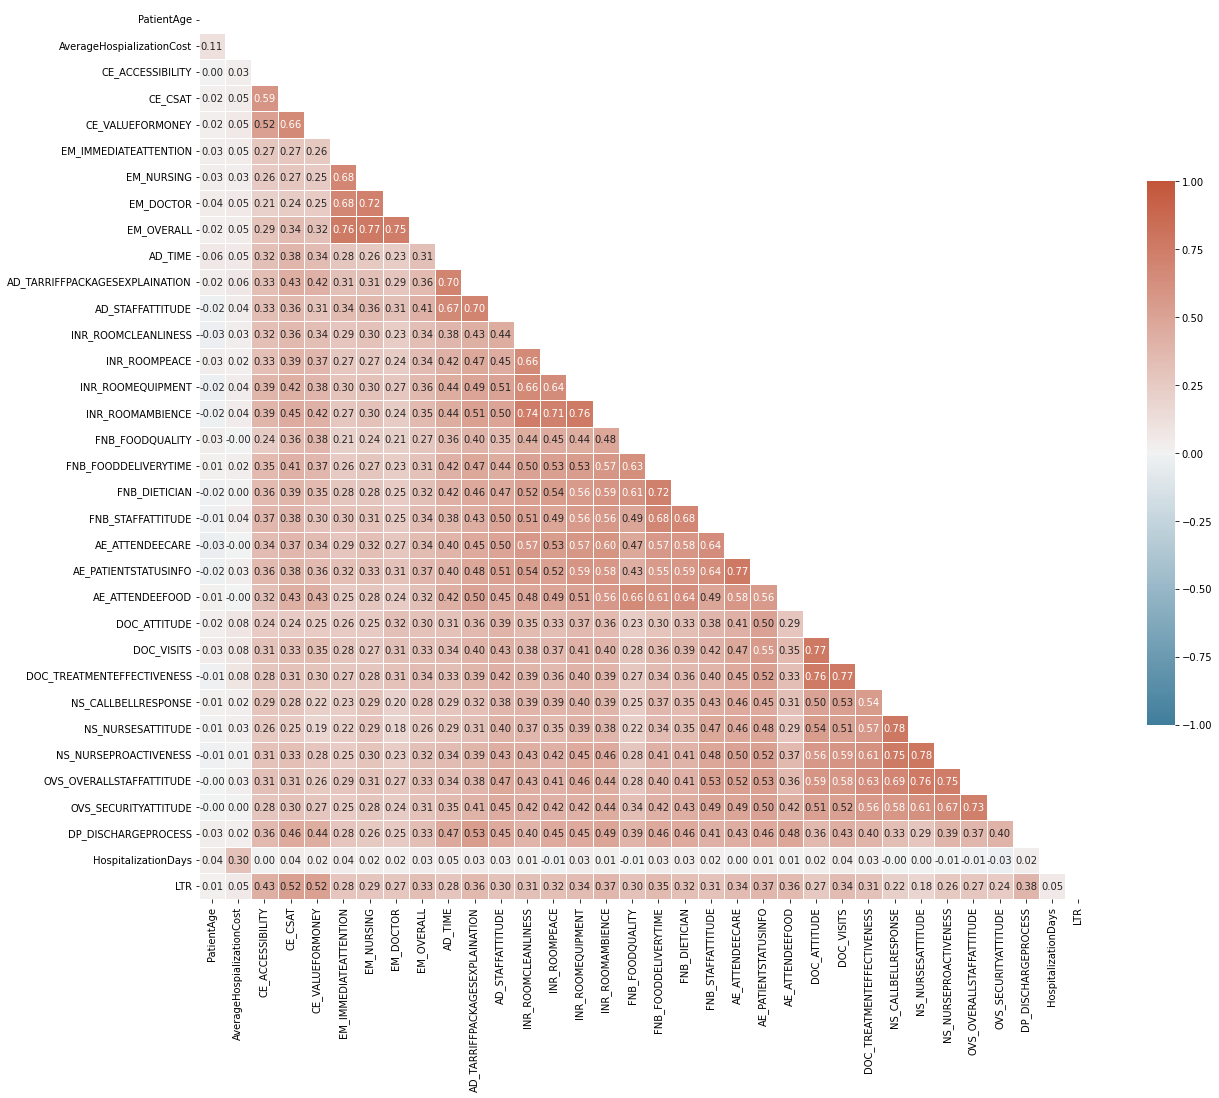

In [48]:
vis_correlation_matrix(corr_matrix, figsize=(20, 20))